In [1]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from pathlib import Path 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
print(os.listdir())

['.idea', 'a.csv', 'e.csv', 'flood.csv', 'Index.ipynb', 'j.csv', 'playground-series-s4e5', 'try.ipynb']


In [3]:
path = Path('playground-series-s4e5')

In [4]:
val = pd.read_csv(path/'train.csv', index_col='id')
test = pd.read_csv(path/'test.csv', index_col='id')
train = pd.read_csv("flood.csv")

In [5]:
train.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  Landslides  \
0              2  ...               10                     7           4   
1              4  ...                9                     2           6   
2              9  ...                7                     4           4   
3              4  ...                4                     2           6   
4              5  ...                7                     6           5   

   Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0           2                            3                4            3   
1           2                            1                1            9   
2           8                            6                1            8   
3           6                            8                8            6   
4           3                            3                4            4   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   2                 6             0.450  
1                   1                 3             0.475  
2                   3                 6             0.515  
3                   6                10             0.520  
4                   3                 4             0.475  

[5 rows x 21 columns]

In [6]:
train.describe(include='all' )

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642   
min        0.000000       0.000000      0.00000      0.000000   
25%        3.000000       3.000000      3.00000      3.000000   
50%        5.000000       5.000000      5.00000      5.000000   
75%        6.000000       6.000000      6.00000      6.000000   
max       17.000000      17.000000     16.00000     16.000000   

       AgriculturalPractices  Encroachments  ...  DrainageSystems  \
count           50000.000000   50000.000000  ...     50000.000000   
mean                5.006120       5.006380  ...         5.006060   
std                 2.234588       2.241633  ...         2.238107   
min                 0.000000       0.000000  ...         0.000000   
25%                 3.000000       3.000000  ...         3.000000   
50%                 5.000000       5.000000  ...         5.000000   
75%                 6.000000       6.000000  ...         6.000000   
max                16.000000      18.000000  ...        17.000000   

       CoastalVulnerability    Landslides   Watersheds  \
count          50000.000000  50000.000000  50000.00000   
mean               4.999920      4.984220      4.97982   
std                2.247101      2.227741      2.23219   
min                0.000000      0.000000      0.00000   
25%                3.000000      3.000000      3.00000   
50%                5.000000      5.000000      5.00000   
75%                6.000000      6.000000      6.00000   
max               17.000000     16.000000     16.00000   

       DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
count                 50000.000000     50000.000000  50000.00000   
mean                      4.988200         4.984980      5.00512   
std                       2.231134         2.238279      2.23176   
min                       0.000000         0.000000      0.00000   
25%                       3.000000         3.000000      3.00000   
50%                       5.000000         5.000000      5.00000   
75%                       6.000000         6.000000      6.00000   
max                      17.000000        19.000000     22.00000   

       InadequatePlanning  PoliticalFactors  FloodProbability  
count        50000.000000      50000.000000      50000.000000  
mean             4.994360          4.990520          0.499660  
std              2.230011          2.246075          0.050034  
min              0.000000          0.000000          0.285000  
25%              3.000000          3.000000          0.465000  
50%              5.000000          5.000000          0.500000  
75%              6.000000          6.000000          0.535000  
max             16.000000         16.000000          0.725000  

[8 rows x 21 columns]

In [7]:
def heatmap(df):
    fig = plt.figure(figsize=(12,12), dpi=200)
    sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='CMRmap', linewidths=1)


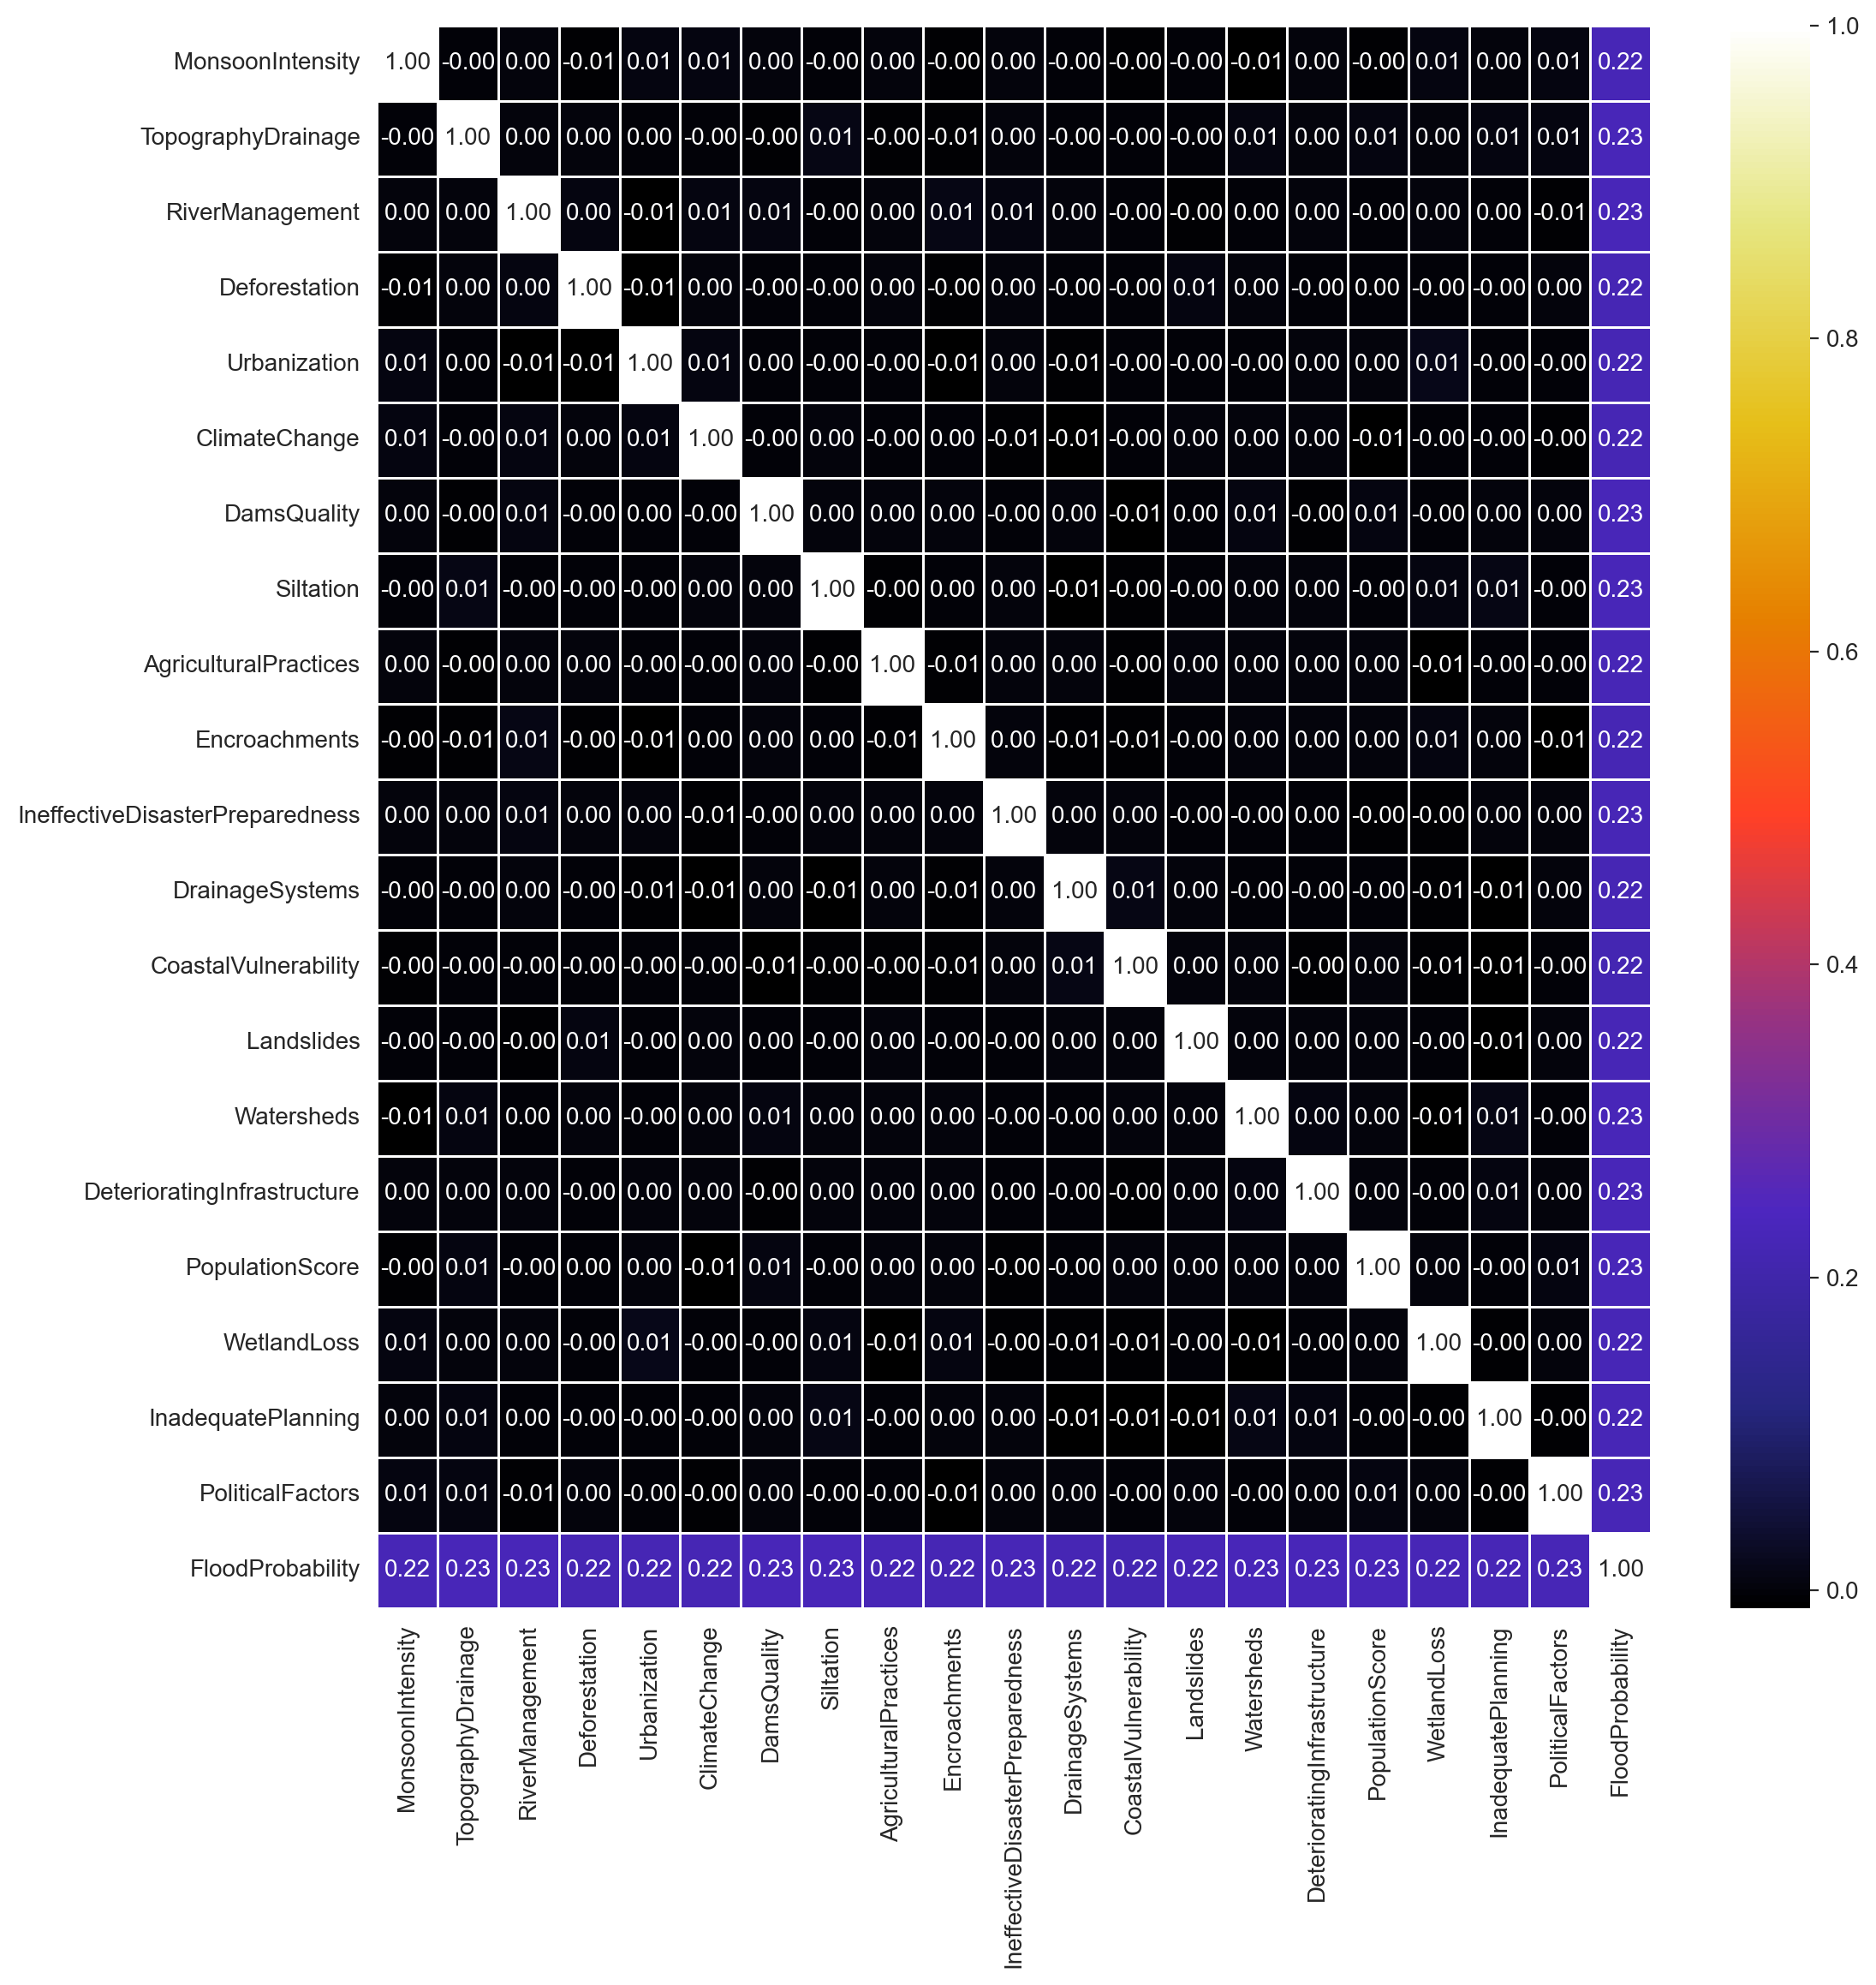

In [8]:
heatmap(train)

In [9]:
pred = train['FloodProbability']
val_preds = val['FloodProbability']
def FeatureEngeenering(df):
    new_df = pd.DataFrame([])
    new_df['Management'] = df['TopographyDrainage']+df['RiverManagement']+ df['DrainageSystems']+df['DamsQuality']+df['AgriculturalPractices']+df['InadequatePlanning']+df['DeterioratingInfrastructure']+df['IneffectiveDisasterPreparedness']
    new_df['Topography'] = df['Deforestation']+df['Urbanization']+df['Siltation']+df['ClimateChange']+df['CoastalVulnerability']+df['Landslides']+df['Watersheds']+df['WetlandLoss']+df['MonsoonIntensity']+df['Watersheds']
    new_df['Political'] = df['Deforestation']+df['Urbanization']*2+df['DamsQuality']*2+df['AgriculturalPractices']+df['IneffectiveDisasterPreparedness']+df['DrainageSystems']+df['DeterioratingInfrastructure']+df['PopulationScore']+df['PoliticalFactors']+df['Encroachments']+df['RiverManagement']+df['WetlandLoss']+df['Siltation']
    new_df['Population'] = df['Urbanization']*2+df['PopulationScore']*2+df['Encroachments']+df['AgriculturalPractices']+df['Deforestation']*2+df['Siltation']+df['Watersheds']
    new_df['Geography'] = df['MonsoonIntensity']+df['Watersheds']+df['TopographyDrainage']+df['RiverManagement']+df['ClimateChange']+df['DrainageSystems']+df['CoastalVulnerability']+df['Landslides']+df['Watersheds']+df['WetlandLoss']+df['Siltation']
    return new_df
train = FeatureEngeenering(train)
test = FeatureEngeenering(test)
val = FeatureEngeenering(val)
train['FloodProbability'] = pred
val['FloodProbability'] = val_preds


In [10]:
print(val.corr())

                  Management  Topography  Political  Population  Geography  \
Management          1.000000   -0.089986   0.520440    0.016602   0.228702   
Topography         -0.089986    1.000000   0.253590    0.463735   0.780873   
Political           0.520440    0.253590   1.000000    0.596821   0.163416   
Population          0.016602    0.463735   0.596821    1.000000   0.139926   
Geography           0.228702    0.780873   0.163416    0.139926   1.000000   
FloodProbability    0.542371    0.551143   0.672643    0.472139   0.587364   

                  FloodProbability  
Management                0.542371  
Topography                0.551143  
Political                 0.672643  
Population                0.472139  
Geography                 0.587364  
FloodProbability          1.000000  


In [11]:
index = test.index

In [92]:
class dataset(Dataset):
    def __init__(self, df , transform= torch.tensor):
        self.pred = np.asarray(df['FloodProbability'])
        self.data = np.asarray(df.drop(['FloodProbability'], axis = 1))
        self.transform = transform
    def __len__(self):
        return len(self.pred)
    def __getitem__(self, idx):
        X = self.transform(self.data[idx]).to(device)
        Y = self.transform(self.pred[idx]).to(device)
        return X, Y

In [93]:
Train_data = dataset(train)
train_loader = DataLoader(dataset = Train_data, batch_size=1 ,shuffle=True)

In [94]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 30)
        self.fc4 = nn.Linear(30, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        return x

In [95]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [96]:
net = Net().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
epochs = 15


In [97]:
for epoch in range(epochs):
    for i, (X, y) in enumerate(train_loader):
        X = X.to(device)
        X = X.to(torch.float32)
        y = y.to(device)
        y = y.to(torch.float32)
        y_pred = net(X).view(-1)
        loss = criterion(y_pred, y).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}')



Epoch [0/15], Step [99/50000], Loss: 0.6887
Epoch [0/15], Step [199/50000], Loss: 0.6897
Epoch [0/15], Step [299/50000], Loss: 0.6940
Epoch [0/15], Step [399/50000], Loss: 0.6939
Epoch [0/15], Step [499/50000], Loss: 0.6944
Epoch [0/15], Step [599/50000], Loss: 0.6919
Epoch [0/15], Step [699/50000], Loss: 0.6917
Epoch [0/15], Step [799/50000], Loss: 0.6930
Epoch [0/15], Step [899/50000], Loss: 0.6930
Epoch [0/15], Step [999/50000], Loss: 0.6931
Epoch [0/15], Step [1099/50000], Loss: 0.6935
Epoch [0/15], Step [1199/50000], Loss: 0.6930
Epoch [0/15], Step [1299/50000], Loss: 0.6964
Epoch [0/15], Step [1399/50000], Loss: 0.6933
Epoch [0/15], Step [1499/50000], Loss: 0.6915
Epoch [0/15], Step [1599/50000], Loss: 0.6908
Epoch [0/15], Step [1699/50000], Loss: 0.6873
Epoch [0/15], Step [1799/50000], Loss: 0.6931
Epoch [0/15], Step [1899/50000], Loss: 0.6887
Epoch [0/15], Step [1999/50000], Loss: 0.6956
Epoch [0/15], Step [2099/50000], Loss: 0.6892
Epoch [0/15], Step [2199/50000], Loss: 0.6919

In [106]:
pred = val['FloodProbability']
val = FeatureEngeenering(val)
val['FloodProbability'] = pred
val_data = dataset(val)
val_loader = DataLoader(dataset = val_data, batch_size=1 ,shuffle=True)
for epoch in range(epochs):
    for i, (X, y) in enumerate(val_loader):
        X = X.to(device)
        X = X.to(torch.float32)
        y = y.to(device)
        y = y.to(torch.float32)
        y_pred = net(X).view(-1)
        loss = criterion(y_pred, y).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [0/15], Step [99/50000], Loss: 0.6931
Epoch [0/15], Step [199/50000], Loss: 0.6840
Epoch [0/15], Step [299/50000], Loss: 0.6924
Epoch [0/15], Step [399/50000], Loss: 0.6926
Epoch [0/15], Step [499/50000], Loss: 0.6800
Epoch [0/15], Step [599/50000], Loss: 0.6900
Epoch [0/15], Step [699/50000], Loss: 0.6840
Epoch [0/15], Step [799/50000], Loss: 0.6963
Epoch [0/15], Step [899/50000], Loss: 0.6921
Epoch [0/15], Step [999/50000], Loss: 0.6941
Epoch [0/15], Step [1099/50000], Loss: 0.6930
Epoch [0/15], Step [1199/50000], Loss: 0.6911
Epoch [0/15], Step [1299/50000], Loss: 0.6844
Epoch [0/15], Step [1399/50000], Loss: 0.6907
Epoch [0/15], Step [1499/50000], Loss: 0.6836
Epoch [0/15], Step [1599/50000], Loss: 0.6904
Epoch [0/15], Step [1699/50000], Loss: 0.6902
Epoch [0/15], Step [1799/50000], Loss: 0.6924
Epoch [0/15], Step [1899/50000], Loss: 0.6984
Epoch [0/15], Step [1999/50000], Loss: 0.6908
Epoch [0/15], Step [2099/50000], Loss: 0.6819
Epoch [0/15], Step [2199/50000], Loss: 0.6921

KeyboardInterrupt: 

In [107]:
class test_dataset(Dataset):
    def __init__(self, df , transform= torch.tensor):
        self.data = np.asarray(df)
        self.transform = transform
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        Y = self.transform(self.data[idx]).to(device)
        return  Y

In [129]:
print(test.shape)
Test_data = test_dataset(test)
test_loader = DataLoader(dataset = Test_data, batch_size=1 ,shuffle=True)

(745305, 5)


In [148]:
sol = []
for i, Y in enumerate(test_loader):
    Y = Y.to(device)
    Y = Y.to(torch.float32)
    y_pred = net(Y).view(-1)
    y_preds = y_pred.to(torch.device('cpu')).detach().numpy()
    sol.append(y_preds[0])
    

In [150]:
sol2 = []
for i, (Y,X) in enumerate(val_loader):
    Y = Y.to(device)
    Y = Y.to(torch.float32)
    y_pred = net(Y).view(-1)
    y_preds = y_pred.to(torch.device('cpu')).detach().numpy()
    sol2.append(y_preds[0])
    

In [12]:
from xgboost import XGBRegressor

In [ ]:
X = np.asarray(val.drop(['FloodProbability'], axis = 1))
Y = np.asarray(val['FloodProbability'])

model = XGBRegressor(n_estimators=1500, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8,device='cuda',  num_parallel_tree=500, max_leaves=1,
                     sampling_method='gradient_based')
for i in range(15):
    model.fit(X, Y)
    print(i)

In [ ]:
temp = np.asarray(test)
temp = model.predict(temp)

In [ ]:
temp2 = pd.DataFrame(np.asarray(index), columns=['id'])
temp2['FloodProbability'] = temp
temp2.info()
temp2.to_csv("j.csv",index=False)